# Importing Python Packages and Data

In [1]:
# Import everything needed

import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import matplotlib
import matplotlib.collections

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.feature_selection import VarianceThreshold

from sklearn import decomposition
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn import metrics
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import accuracy_score, f1_score, precision_score, roc_auc_score, recall_score, PrecisionRecallDisplay

matplotlib.rcParams['font.family'] = ['arial']

In [2]:
total_data = pd.read_csv("cleaned_data.dbcan_cog_HGT.tsv", sep="\t")
total_data = total_data.drop(columns = ['Unnamed: 0'])

In [3]:
metadata = pd.read_csv("jgi_metadata_processed.csv")
metadata = metadata.rename(columns={'2016_taxon_oid':'taxonID'})

In [4]:
print(total_data.shape)
total_data.head()

(3772, 4564)


,taxonID,Order,Classification,Root_info,AA1,AA10,AA12,AA3,AA4,AA5,...,COG5654,COG5655,COG5658,COG5659,COG5660,COG5661,COG5662,COG5663,COG5664,Horizontally_Transferred_%
0,2511231155,Acinetobacter,NPA,NPA,0.000252,0.0,0.000000,0.000252,0.000252,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10
1,2519103115,Acinetobacter,NPA,NPA,0.000265,0.0,0.000265,0.000265,0.000265,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.27
2,2519899735,Acinetobacter,NPA,NPA,0.000262,0.0,0.000262,0.000262,0.000262,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10
3,2526164562,Acinetobacter,NPA,NPA,0.000495,0.0,0.000000,0.000248,0.000248,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.16
4,2529293005,Acinetobacter,NPA,NPA,0.000263,0.0,0.000263,0.000263,0.000263,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.45


In [5]:
print(metadata.shape)
metadata.head()

(3837, 54)


,taxonID,Name,Classification,Root-NotRoot,Taxonomic_Group,IMG_Phylum,IMG_Class,IMG_Order,IMG_Family,IMG_Genus,...,KOG_Count_,KOG_%_,Pfam_Count___*_assembled,Pfam_%___*_assembled,Enzyme_Count___*_assembled,Enzyme_%___*_assembled,KEGG_Count___*_assembled,KEGG_%___*_assembled,Horizontally_Transferred_Count,Horizontally_Transferred_%
0,2593339129,Acinetobacter_sp._UNC434CL69Tsu2S25,PA,RA,Acinetobacter,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Moraxellaceae,Acinetobacter,...,837.0,20.67,3201.0,79.06,1127.0,27.83,1143.0,28.23,2.0,0.05
1,2558860101,Acinetobacter_sp._UNC436CL71CviS28,PA,RA,Acinetobacter,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Moraxellaceae,Acinetobacter,...,713.0,22.57,2499.0,79.11,966.0,30.58,978.0,30.96,6.0,0.19
2,2582581295,Acinetobacter_calcoaceticus_WP19,PA,PA,Acinetobacter,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Moraxellaceae,Acinetobacter,...,841.0,21.94,3079.0,80.33,1104.0,28.80,1126.0,29.38,2.0,0.05
3,2615840642,Acinetobacter_sp._YR461,PA,PA,Acinetobacter,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Moraxellaceae,Acinetobacter,...,854.0,22.49,3073.0,80.91,1102.0,29.02,1133.0,29.83,13.0,0.34
4,2579778587,Acinetobacter_baumanii_BIDMC_56,NPA,NPA,Acinetobacter,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Moraxellaceae,Acinetobacter,...,842.0,22.32,3055.0,80.99,1100.0,29.16,1123.0,29.77,1.0,0.03


In [6]:
# Removing soil! 

df = total_data[total_data["Classification"] != "soil"]
print(df.shape)
order = df['Order']
df.head()

(3261, 4564)


,taxonID,Order,Classification,Root_info,AA1,AA10,AA12,AA3,AA4,AA5,...,COG5654,COG5655,COG5658,COG5659,COG5660,COG5661,COG5662,COG5663,COG5664,Horizontally_Transferred_%
0,2511231155,Acinetobacter,NPA,NPA,0.000252,0.0,0.000000,0.000252,0.000252,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10
1,2519103115,Acinetobacter,NPA,NPA,0.000265,0.0,0.000265,0.000265,0.000265,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.27
2,2519899735,Acinetobacter,NPA,NPA,0.000262,0.0,0.000262,0.000262,0.000262,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10
3,2526164562,Acinetobacter,NPA,NPA,0.000495,0.0,0.000000,0.000248,0.000248,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.16
4,2529293005,Acinetobacter,NPA,NPA,0.000263,0.0,0.000263,0.000263,0.000263,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.45


# Data Preprocessing and Feature Selection, all models

In [7]:
# Scaling data with Standard Scaler, code from Muyoung

features = df.columns[4:]
scaler = StandardScaler().fit(df[features])
df_normalized = pd.DataFrame(scaler.transform(df[features]), columns=features)
df = pd.concat([df.iloc[:, :4], df_normalized], axis=1)
df.head()

,taxonID,Order,Classification,Root_info,AA1,AA10,AA12,AA3,AA4,AA5,...,COG5654,COG5655,COG5658,COG5659,COG5660,COG5661,COG5662,COG5663,COG5664,Horizontally_Transferred_%
0,2511231155,Acinetobacter,NPA,NPA,0.066808,-0.378513,-0.423784,-0.389091,1.002863,-0.170719,...,-0.578561,-0.105001,-0.268621,-0.087445,-0.404687,-0.304982,-0.76716,-0.229263,-0.271738,-0.331415
1,2519103115,Acinetobacter,NPA,NPA,0.136692,-0.378513,2.474260,-0.348927,1.096538,-0.170719,...,-0.578561,-0.105001,-0.268621,-0.087445,-0.404687,-0.304982,-0.76716,-0.229263,-0.271738,-0.313281
2,2519899735,Acinetobacter,NPA,NPA,0.121340,-0.378513,2.441586,-0.357750,1.075959,-0.170719,...,-0.578561,-0.105001,-0.268621,-0.087445,-0.404687,-0.304982,-0.76716,-0.229263,-0.271738,-0.331415
3,2526164562,Acinetobacter,NPA,NPA,1.317699,-0.378513,-0.423784,-0.400855,0.975425,-0.170719,...,-0.578561,-0.105001,-0.268621,-0.087445,-0.404687,-0.304982,-0.76716,-0.229263,-0.271738,-0.218343
4,2529293005,Acinetobacter,NPA,NPA,0.123815,-0.378513,2.446855,-0.356327,1.079278,-0.170719,...,-0.578561,-0.105001,-0.268621,-0.087445,-0.404687,-0.304982,-0.76716,-0.229263,-0.271738,-0.294080


In [8]:
# Removing features with zero variance, code from Muyoung 

constant_filter = VarianceThreshold(threshold=0) 
constant_filter.fit(df[features])
features = constant_filter.get_feature_names_out(features)

X = df[features]
y = df["Classification"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)

In [9]:
len(features)

4540

# Principal Component Analysis

In [10]:
# Actually doing the PCA

pca = decomposition.PCA(n_components=2, random_state = 42)

pca_result = pca.fit_transform(X)

# Making labels for plotting the graph

labels = y.ravel()

for idx, val in enumerate(labels):
    if val == "NPA":
        labels[idx] = 0
    elif val == "PA":
        labels[idx] = 1
    else:
        print("Error!")

x_plot = pca_result[:,0]
y_plot = pca_result[:,1]

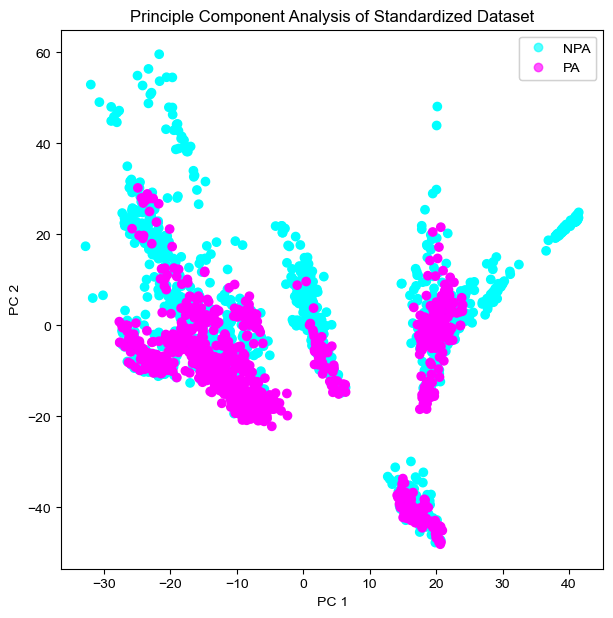

In [11]:
# Plotting by classification

fig, ax = plt.subplots(1, figsize = (7,7))

scatter1 = ax.scatter(x_plot,y_plot, c = labels, cmap = "cool")
handles, _ = scatter1.legend_elements(prop="colors", alpha=0.6) # use my own labels
legend1 = ax.legend(handles, ["NPA", "PA"], loc="upper right")
ax.add_artist(legend1)

pca_result = pd.DataFrame(pca_result)
    
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_title("Principle Component Analysis of Standardized Dataset")
plt.savefig("PCA_SDS_Final_Project.svg")
plt.show()

In [106]:
# This block of code deals with making bacterial orders categorical, for PC visualization

orders = order.unique()
order_numeric = np.zeros((len(orders),1))

order_forplotting = order

for idx, val in enumerate(orders):
    print(idx, val)
    order_forplotting = order_forplotting.replace(str(val), idx)

0 Acinetobacter
1 Actinobacteria
2 Alphaproteobacteria
3 Bacillales
4 Bacteroidetes
5 Burkholderiales
6 Pseudomonas
7 Xanthomonadaceae


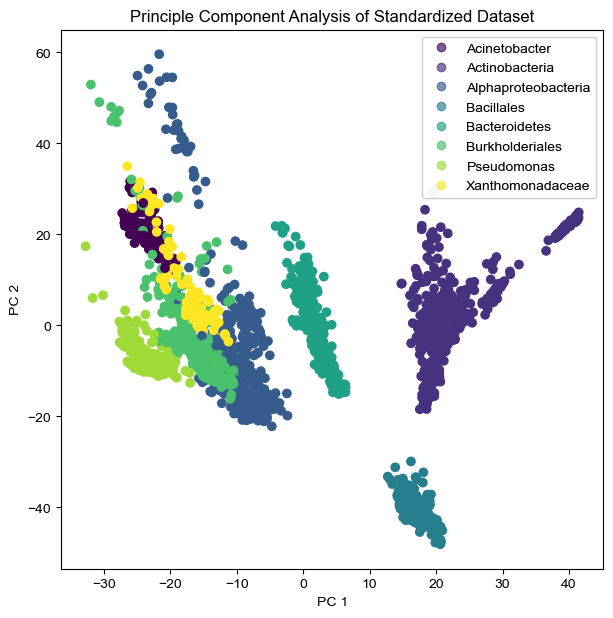

In [13]:
# Plotting by order

fig, ax = plt.subplots(1, figsize = (7,7))

scatter1 = ax.scatter(x_plot,y_plot, c = order_forplotting.ravel())
handles, _ = scatter1.legend_elements(prop="colors", alpha=0.6) # use my own labels
legend1 = ax.legend(handles, orders, loc="upper right")
ax.add_artist(legend1)
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_title("Principle Component Analysis of Standardized Dataset")
plt.savefig("PCA_SDS_Final_Project_Orders.svg")
plt.show()

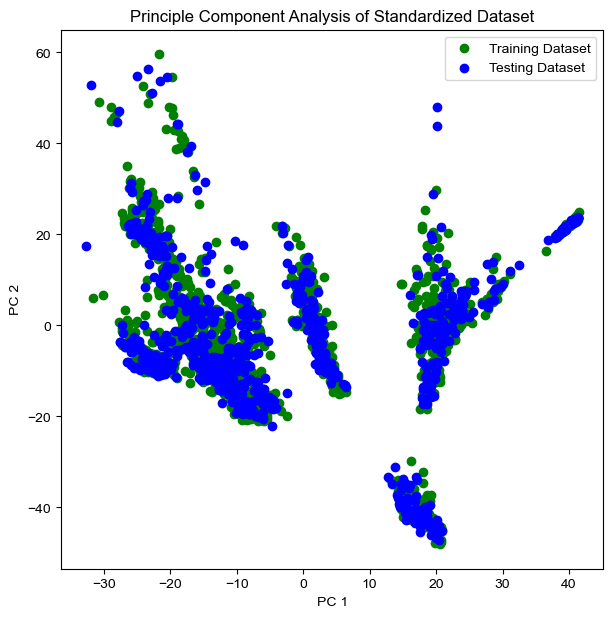

In [14]:
# Plotting by train and test

x_train_plot = (pd.DataFrame(x_plot)).iloc[X_train.index]
y_train_plot = (pd.DataFrame(y_plot)).iloc[X_train.index]
x_test_plot = (pd.DataFrame(x_plot)).iloc[X_test.index]
y_test_plot = (pd.DataFrame(y_plot)).iloc[X_test.index]

fig, ax = plt.subplots(1, figsize = (7,7))
ax.scatter(x_train_plot, y_train_plot, c = 'green')
ax.scatter(x_test_plot, y_test_plot, c = 'blue')
ax.legend(['Training Dataset', 'Testing Dataset'])
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_title("Principle Component Analysis of Standardized Dataset")
plt.show()

In [15]:
dataset_pca = pd.DataFrame(abs(pca.components_),columns=X.columns, index=['PC_1', 'PC_2'])
dataset_pca.to_csv('PCA_of_Dataset.csv')

In [16]:
dataset_pca_t = dataset_pca.transpose()

In [17]:
dataset_pca_t.nlargest(20, "PC_1")["PC_1"]

COG0391    0.040889
COG2138    0.040196
COG0311    0.040104
COG3480    0.040014
COG1481    0.039897
COG1799    0.039878
CE14       0.039823
COG3253    0.039497
COG1837    0.039455
COG3599    0.039155
COG0214    0.038961
COG0811    0.038852
COG1623    0.038783
COG1847    0.038581
COG1461    0.037936
COG1566    0.037797
COG1438    0.037690
COG5282    0.037641
COG0841    0.037634
COG0795    0.037535
Name: PC_1, dtype: float64

In [18]:
dataset_pca_t.nlargest(20, "PC_2")["PC_2"]

COG0321    0.042216
COG0792    0.040508
COG0539    0.039709
COG1109    0.039575
COG0726    0.038774
COG0484    0.038504
COG1678    0.038162
COG0322    0.038046
COG0221    0.037873
COG0354    0.037844
COG0238    0.037730
COG0108    0.037338
COG1391    0.036615
COG1873    0.036538
COG1284    0.036452
COG1164    0.036084
COG0609    0.035778
COG0240    0.035664
COG1658    0.035550
COG1939    0.035541
Name: PC_2, dtype: float64

# The Same Thing, But With Soil!

In [19]:
# The whole dataset, with metadata

df_for_pca_with_soil = total_data
merged_df = df_for_pca_with_soil.merge(metadata, how = 'left', on = ['taxonID'])
merged_df.shape

(3772, 4617)

In [20]:
X_ws = df_for_pca_with_soil[features]
scaler_ws = StandardScaler().fit(df_for_pca_with_soil[features])
df_ws_normalized = pd.DataFrame(scaler_ws.transform(df_for_pca_with_soil[features]), columns=features)

labels_ns_y = df_for_pca_with_soil['Classification']

In [21]:
total_data['Classification']

0        NPA
1        NPA
2        NPA
3        NPA
4        NPA
        ... 
3767    soil
3768    soil
3769    soil
3770    soil
3771    soil
Name: Classification, Length: 3772, dtype: object

In [22]:
df_ws_normalized.describe()

,AA1,AA10,AA12,AA3,AA4,AA5,AA6,AA7,CBM11,CBM12,...,COG5654,COG5655,COG5658,COG5659,COG5660,COG5661,COG5662,COG5663,COG5664,Horizontally_Transferred_%
count,3.772000e+03,3.772000e+03,3.772000e+03,3.772000e+03,3.772000e+03,3.772000e+03,3.772000e+03,3.772000e+03,3.772000e+03,3.772000e+03,...,3.772000e+03,3.772000e+03,3.772000e+03,3.772000e+03,3.772000e+03,3.772000e+03,3.772000e+03,3.772000e+03,3.772000e+03,3.772000e+03
mean,2.278014e-15,3.233422e-15,5.231352e-15,6.475320e-16,-8.822035e-16,2.072735e-15,5.572072e-15,-1.266102e-15,5.641549e-16,8.379653e-16,...,-2.269541e-15,2.096664e-15,-4.837417e-15,-9.241753e-16,2.749038e-15,-5.219196e-15,-3.203547e-15,-2.896940e-15,6.161326e-15,-1.577623e-17
std,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,...,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00
min,-1.190896e+00,-4.135575e-01,-4.104701e-01,-1.078922e+00,-7.770651e-01,-1.727994e-01,-8.420561e-01,-6.638166e-01,-1.195870e-01,-1.600186e-01,...,-5.477423e-01,-1.105268e-01,-3.231930e-01,-9.962624e-02,-3.754049e-01,-2.932933e-01,-7.556881e-01,-2.620911e-01,-2.562670e-01,-3.581674e-01
25%,-1.190896e+00,-4.135575e-01,-4.104701e-01,-1.078922e+00,-7.770651e-01,-1.727994e-01,-8.420561e-01,-6.638166e-01,-1.195870e-01,-1.600186e-01,...,-5.477423e-01,-1.105268e-01,-3.231930e-01,-9.962624e-02,-3.754049e-01,-2.932933e-01,-7.556881e-01,-2.620911e-01,-2.562670e-01,-3.508436e-01
50%,2.728930e-02,-4.135575e-01,-4.104701e-01,-2.594085e-01,-7.770651e-01,-1.727994e-01,-1.230810e-01,-6.638166e-01,-1.195870e-01,-1.600186e-01,...,-5.477423e-01,-1.105268e-01,-3.231930e-01,-9.962624e-02,-3.754049e-01,-2.932933e-01,-7.556881e-01,-2.620911e-01,-2.562670e-01,-2.870211e-01
75%,4.523122e-01,-4.135575e-01,-4.104701e-01,4.695182e-01,8.656334e-01,-1.727994e-01,3.696568e-01,3.511943e-01,-1.195870e-01,-1.600186e-01,...,3.943936e-01,-1.105268e-01,-3.231930e-01,-9.962624e-02,-3.754049e-01,-2.932933e-01,6.044743e-01,-2.620911e-01,-2.562670e-01,-5.788820e-02
max,5.919944e+00,1.311816e+01,6.271319e+00,5.606979e+00,1.261818e+01,1.158302e+01,3.400884e+00,5.411377e+00,1.739790e+01,1.176349e+01,...,9.210193e+00,1.720944e+01,6.962852e+00,5.215984e+01,3.835886e+00,1.096988e+01,4.867701e+00,9.932682e+00,9.842049e+00,9.888993e+00


In [23]:
df_normalized.describe()

,AA1,AA10,AA12,AA3,AA4,AA5,AA6,AA7,CBM11,CBM12,...,COG5654,COG5655,COG5658,COG5659,COG5660,COG5661,COG5662,COG5663,COG5664,Horizontally_Transferred_%
count,3.261000e+03,3.261000e+03,3.261000e+03,3.261000e+03,3.261000e+03,3.261000e+03,3.261000e+03,3.261000e+03,3.261000e+03,3.261000e+03,...,3.261000e+03,3.261000e+03,3.261000e+03,3.261000e+03,3.261000e+03,3.261000e+03,3.261000e+03,3.261000e+03,3.261000e+03,3.261000e+03
mean,1.712556e-15,-1.051188e-15,-4.929479e-15,-1.645929e-16,-3.441657e-15,2.758824e-15,4.953617e-18,-1.305848e-15,6.577501e-16,-3.299177e-16,...,-1.306223e-15,-3.281133e-17,-1.737681e-15,-7.979153e-16,1.408118e-14,2.418455e-15,-1.630642e-15,3.351318e-15,-1.805636e-15,-2.139248e-16
std,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,...,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00
min,-1.225023e+00,-3.785130e-01,-4.237837e-01,-1.131537e+00,-7.287511e-01,-1.707186e-01,-8.588556e-01,-6.444161e-01,-1.153725e-01,-1.508153e-01,...,-5.785605e-01,-1.050008e-01,-2.686215e-01,-8.744543e-02,-4.046868e-01,-3.049818e-01,-7.671604e-01,-2.292630e-01,-2.717377e-01,-3.420817e-01
25%,-5.798379e-01,-3.785130e-01,-4.237837e-01,-6.935401e-01,-7.287511e-01,-1.707186e-01,-8.588556e-01,-6.444161e-01,-1.153725e-01,-1.508153e-01,...,-5.785605e-01,-1.050008e-01,-2.686215e-01,-8.744543e-02,-4.046868e-01,-3.049818e-01,-7.671604e-01,-2.292630e-01,-2.717377e-01,-3.367482e-01
50%,1.382565e-02,-3.785130e-01,-4.237837e-01,-2.098556e-01,-7.287511e-01,-1.707186e-01,-1.421662e-01,-6.444161e-01,-1.153725e-01,-1.508153e-01,...,-5.785605e-01,-1.050008e-01,-2.686215e-01,-8.744543e-02,-4.046868e-01,-3.049818e-01,-7.671604e-01,-2.292630e-01,-2.717377e-01,-2.780791e-01
75%,4.322394e-01,-3.785130e-01,-4.237837e-01,4.513133e-01,9.085385e-01,-1.707186e-01,3.827471e-01,3.231793e-01,-1.153725e-01,-1.508153e-01,...,4.180385e-01,-1.050008e-01,-2.686215e-01,-8.744543e-02,-4.046868e-01,-3.049818e-01,5.717185e-01,-2.292630e-01,-2.717377e-01,-5.833674e-02
max,5.857773e+00,1.453105e+01,6.115020e+00,5.662258e+00,1.281079e+01,1.139238e+01,3.270328e+00,5.341840e+00,1.776969e+01,1.229220e+01,...,8.695261e+00,1.746971e+01,8.107068e+00,4.965423e+01,3.401578e+00,1.052660e+01,4.753245e+00,9.738495e+00,9.438638e+00,1.010528e+01


In [24]:
# Redoing PCA, with soil! 

pca_result_ns = pca.fit_transform(df_ws_normalized)

x_plot_ns = pca_result_ns[:,0]
y_plot_ns = pca_result_ns[:,1]

In [25]:
# Without soil

df_for_pca_no_soil = merged_df[merged_df['Classification_x'] != "soil"]
print(df_for_pca_no_soil.shape)

df_for_pca_soil_only = merged_df[merged_df['Classification_x'] == 2]

(3261, 4617)


In [107]:
# Making numerical categories (to plot orders)

pca_orders = df_for_pca_no_soil['IMG_Order'].unique()
pca_order_numeric = pd.DataFrame(df_for_pca_no_soil['IMG_Order'])

for idx, val in enumerate(pca_orders):
    pca_order_numeric = pca_order_numeric.replace(str(val), idx)
    
pca_orders_ws = merged_df['IMG_Order'].unique()
pca_order_numeric_ws = pd.DataFrame(merged_df['IMG_Order'])

for idx, val in enumerate(pca_orders_ws):
    print(idx,val)
    pca_order_numeric_ws = pca_order_numeric_ws.replace(str(val), idx)

0 Pseudomonadales
1 Actinomycetales
2 Micrococcales
3 Corynebacteriales
4 Propionibacteriales
5 Rhizobiales
6 Caulobacterales
7 Sphingomonadales
8 unclassified
9 Bacillales
10 Flavobacteriales
11 Cytophagales
12 Sphingobacteriales
13 Burkholderiales
14 Xanthomonadales
15 Lysobacterales
16 Streptomycetales
17 Rhizobialez


In [108]:
pca_order_numeric_ws

,IMG_Order
0,0
1,0
2,0
3,0
4,0
...,...
3767,14
3768,14
3769,14
3770,14


In [27]:
# Showing test train dataset

x_train_plot_ns = (pd.DataFrame(x_plot_ns)).iloc[X_train.index]
y_train_plot_ns = (pd.DataFrame(y_plot_ns)).iloc[X_train.index]
x_test_plot_ns = (pd.DataFrame(x_plot_ns)).iloc[X_test.index]
y_test_plot_ns = (pd.DataFrame(y_plot_ns)).iloc[X_test.index]
x_soil_plot_ns = (pd.DataFrame(x_plot_ns)).iloc[df_for_pca_soil_only.index]
y_soil_plot_ns = (pd.DataFrame(y_plot_ns)).iloc[df_for_pca_soil_only.index]

In [28]:
x_plot_NPA = x_plot[labels == 0]
y_plot_NPA = y_plot[labels == 0]
x_plot_PA = x_plot[labels == 1]
y_plot_PA = y_plot[labels == 1]

x_plot_NPA_ns = x_plot_ns[labels_ns_y == 'NPA']
y_plot_NPA_ns = y_plot_ns[labels_ns_y == 'NPA']

x_plot_PA_ns = x_plot_ns[labels_ns_y == 'PA']
y_plot_PA_ns = y_plot_ns[labels_ns_y == 'PA']

x_plot_soil_ns = x_plot_ns[labels_ns_y == 'soil']
y_plot_soil_ns = y_plot_ns[labels_ns_y == 'soil']

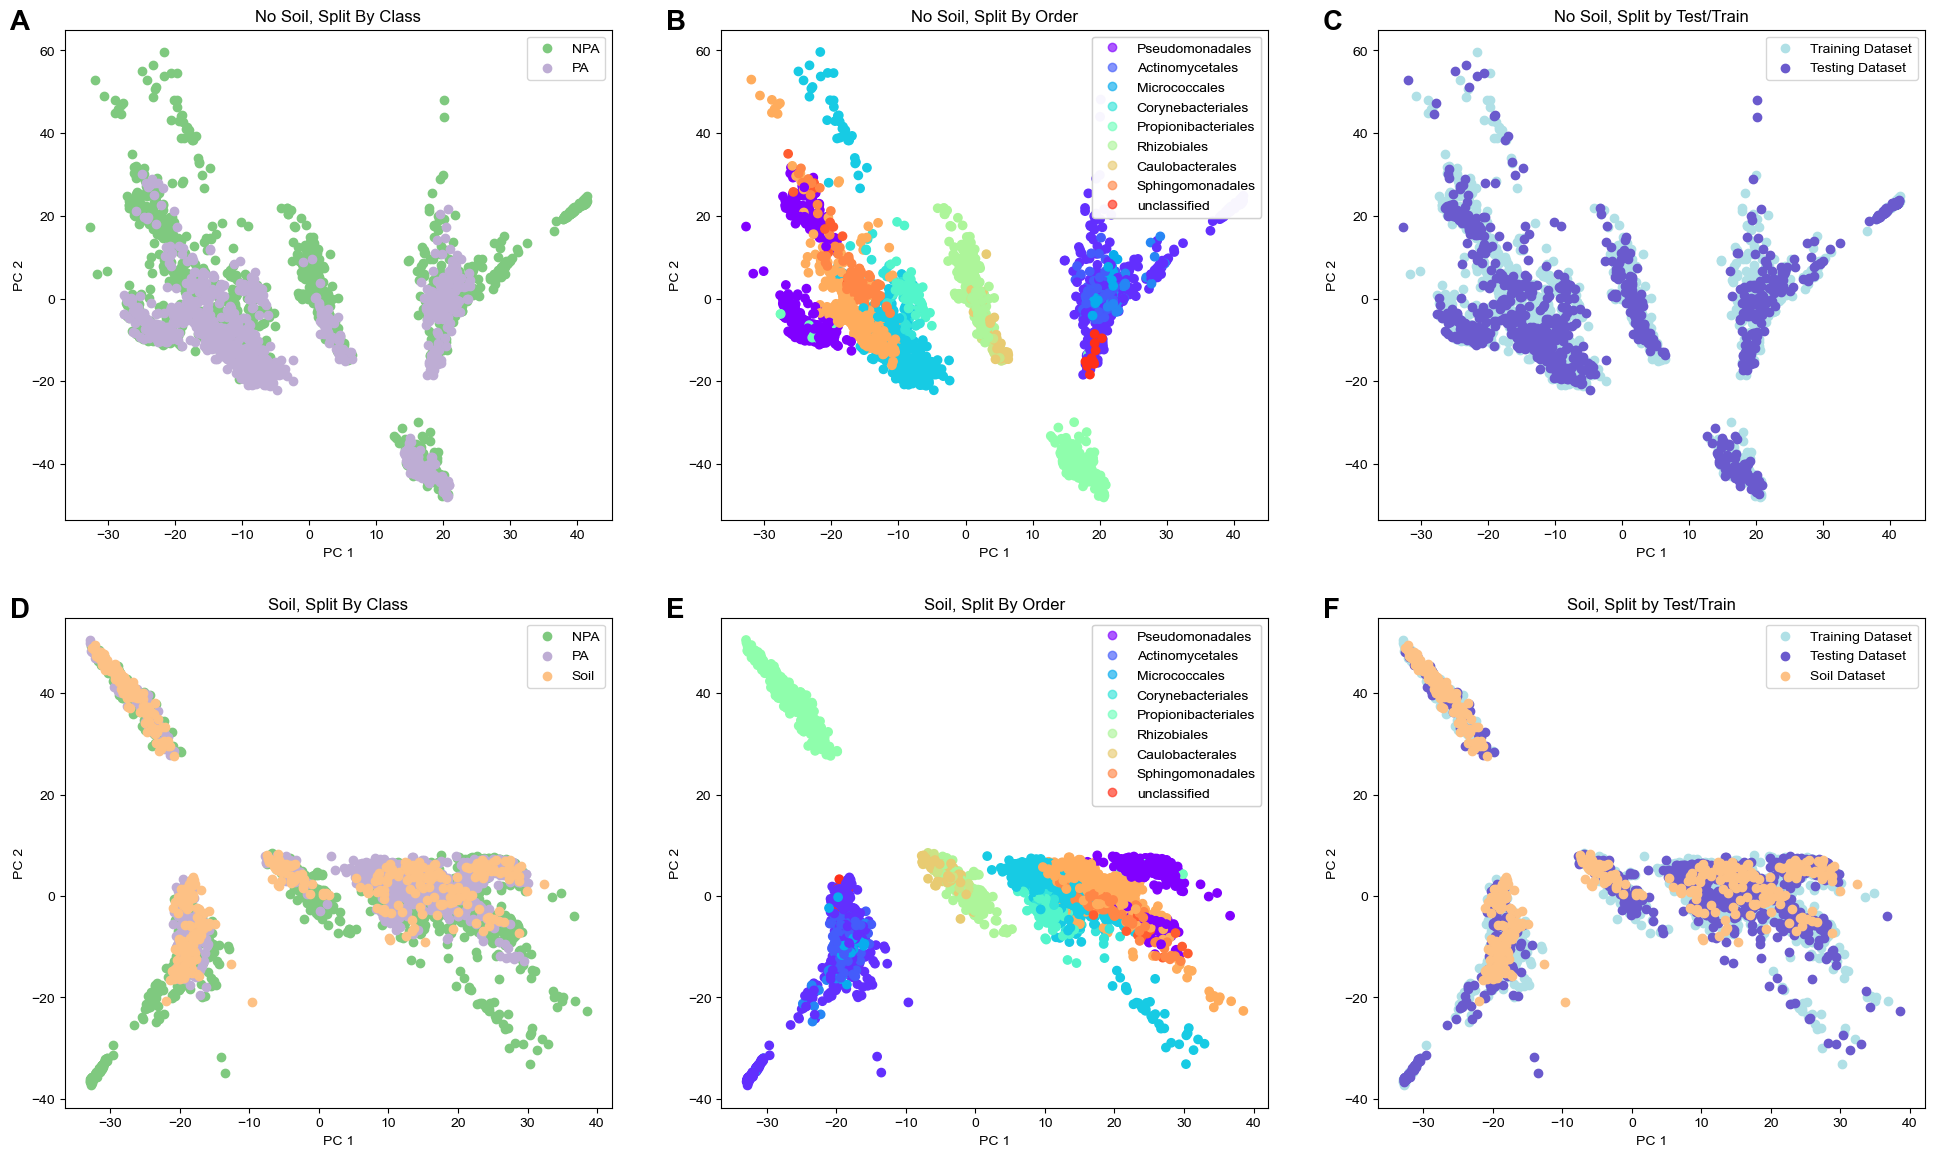

<Figure size 640x480 with 0 Axes>

In [29]:
# Visualization

fig, ax = plt.subplots(2,3, figsize = (24,14))

#scatter1 = ax[0,0].scatter(x_plot,y_plot, c = labels)
#handles, _ = scatter1.legend_elements(prop="colors", alpha=0.6)
#legend1 = ax[0,0].legend(handles, ["NPA", "PA"], loc="upper right")
#ax[0,0].add_artist(legend1)
ax[0,0].scatter(x_plot_NPA,y_plot_NPA, color = '#7fc97f')
ax[0,0].scatter(x_plot_PA,y_plot_PA, color = '#beadd4')
ax[0,0].legend(['NPA','PA'])
ax[0,0].set_xlabel("PC 1")
ax[0,0].set_ylabel("PC 2")
ax[0,0].set_title("No Soil, Split By Class")
ax[0,0].text(-0.1, 1, 'A', size=20, transform=ax[0,0].transAxes, weight='bold')

scatter2 = ax[0,1].scatter(x_plot,y_plot, c = np.array(pca_order_numeric), cmap = 'rainbow')
handles, _ = scatter2.legend_elements(prop="colors", alpha=0.6) 
legend1 = ax[0,1].legend(handles, pca_orders, loc="upper right")
ax[0,1].add_artist(legend1)
ax[0,1].set_xlabel("PC 1")
ax[0,1].set_ylabel("PC 2")
ax[0,1].set_title("No Soil, Split By Order")
ax[0,1].text(-0.1, 1, 'B', size=20, transform=ax[0,1].transAxes, weight='bold')

ax[0,2].scatter(x_train_plot, y_train_plot, c = 'powderblue')
ax[0,2].scatter(x_test_plot, y_test_plot, c = 'slateblue')
ax[0,2].legend(['Training Dataset', 'Testing Dataset'], loc="upper right")
ax[0,2].set_xlabel("PC 1")
ax[0,2].set_ylabel("PC 2")
ax[0,2].set_title("No Soil, Split by Test/Train")
ax[0,2].text(-0.1, 1, 'C', size=20, transform=ax[0,2].transAxes, weight='bold')

ax[1,0].set_xlabel("PC 1")
ax[1,0].set_ylabel("PC 2")
ax[1,0].set_title("Soil, Split By Class")
ax[1,0].scatter(x_plot_NPA_ns,y_plot_NPA_ns, color = '#7fc97f')
ax[1,0].scatter(x_plot_PA_ns,y_plot_PA_ns, color = '#beadd4')
ax[1,0].scatter(x_plot_soil_ns,y_plot_soil_ns, c = '#fdc185')
ax[1,0].legend(['NPA', 'PA', 'Soil'])
ax[1,0].text(-0.1, 1, 'D', size=20, transform=ax[1,0].transAxes, weight='bold')

scatter4 = ax[1,1].scatter(x_plot_ns,y_plot_ns, c = np.array(pca_order_numeric_ws), cmap = 'rainbow')
handles, _ = scatter4.legend_elements(prop="colors", alpha=0.6) 
legend1 = ax[1,1].legend(handles, pca_orders, loc="upper right")
ax[1,1].add_artist(legend1)
ax[1,1].set_xlabel("PC 1")
ax[1,1].set_ylabel("PC 2")
ax[1,1].set_title("Soil, Split By Order")
ax[1,1].text(-0.1, 1, 'E', size=20, transform=ax[1,1].transAxes, weight='bold')

ax[1,2].scatter(x_train_plot_ns, y_train_plot_ns, c = 'powderblue')
ax[1,2].scatter(x_test_plot_ns, y_test_plot_ns, c = 'slateblue')
ax[1,2].scatter(x_plot_soil_ns, y_plot_soil_ns, color = '#fdc185')
ax[1,2].set_xlabel("PC 1")
ax[1,2].set_ylabel("PC 2")
ax[1,2].set_title("Soil, Split by Test/Train")
ax[1,2].legend(['Training Dataset','Testing Dataset','Soil Dataset'])
ax[1,2].text(-0.1, 1, 'F', size=20, transform=ax[1,2].transAxes, weight='bold')

plt.show()
plt.savefig("PCA_final.jpg")

In [159]:
pca_order = np.array(pca_order_numeric)
pseudomonas_idx = pca_order == 0
pseudomonas_idx = pseudomonas_idx[:,0]

In [177]:
x_pseudo_plot_PA = []
y_pseudo_plot_PA = []

x_pseudo_plot_NPA = []
y_pseudo_plot_NPA = []


for idx, val in enumerate(x_plot):
    isInPseudo = pca_order[idx] == 0
    isInPA = y[idx] == 'PA'
    isInNPA = y[idx] == 'NPA'
    if isInPseudo:
        if isInPA:
            x_pseudo_plot_PA.append(val)
            y_pseudo_plot_PA.append(y_plot[idx])
        elif isInNPA:
            x_pseudo_plot_NPA.append(val)
            y_pseudo_plot_NPA.append(y_plot[idx])
        else:
            print('error - not in NPA or PA')
    else:
        print('Point not classified')
            

Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not classified
Point not cla

In [178]:
pca_order[idx]

array([14])

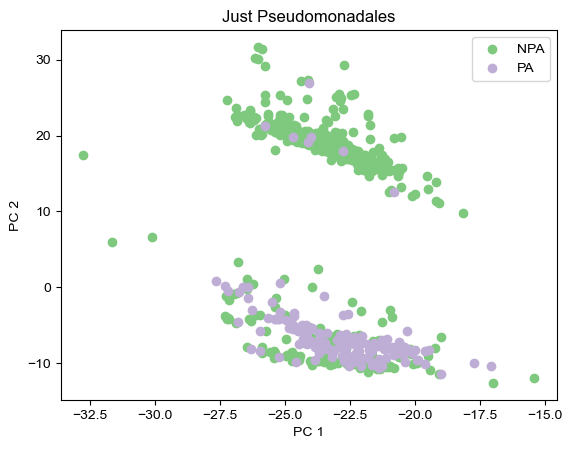

In [185]:
fig, ax = plt.subplots(1)

ax.scatter(x_pseudo_plot_NPA, y_pseudo_plot_NPA, c = '#7fc97f')
ax.scatter(x_pseudo_plot_PA, y_pseudo_plot_PA, c = '#beadd4')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('Just Pseudomonadales')
ax.legend(['NPA','PA'])

In [165]:
x_plot_PA_only = (x_plot[y == 'PA']) & (x_plot[pseudomonas_idx])
#y_plot_PA_only = (y_plot[y == 'PA'])
#x_plot_NPA_only = (y_plot[y == 'NPA'])
#y_plot_NPA_only = (y_plot[y == 'NPA'])

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [156]:
index = pca_order == 0

In [157]:
x_plot[index[:,0]]

array([-23.84528081, -24.70774744, -25.375533  , -23.83128087,
       -25.17905758, -23.79900112, -23.52760202, -24.68651053,
       -23.47472777, -26.91767314, -25.9833689 , -24.21902745,
       -24.23985007, -23.3430173 , -23.05076739, -22.80538345,
       -24.12170114, -25.08254439, -24.36959423, -22.50159403,
       -21.684043  , -22.34460479, -23.45035058, -22.21227113,
       -22.0675826 , -21.13373693, -23.79622404, -23.10668122,
       -24.01356609, -22.85357658, -25.09636412, -25.50487691,
       -23.40886297, -26.35207055, -24.12439426, -24.18777986,
       -24.19010008, -26.1953993 , -24.52260634, -26.36050072,
       -23.90844029, -25.01592321, -25.81116773, -23.72102162,
       -25.37593185, -24.93526677, -21.72235296, -20.55214858,
       -22.79038558, -24.74527583, -23.42900583, -26.2395314 ,
       -22.79237888, -25.57981712, -24.6134477 , -24.17569382,
       -23.61728457, -22.3475966 , -22.28712053, -25.13474344,
       -24.20474819, -23.85315708, -24.87586139, -24.82

In [130]:
y

0       NPA
1       NPA
2       NPA
3       NPA
4       NPA
       ... 
3256     PA
3257     PA
3258     PA
3259     PA
3260     PA
Name: Classification, Length: 3261, dtype: object

Text(0.5, 1.0, 'No Soil, Split By Order')

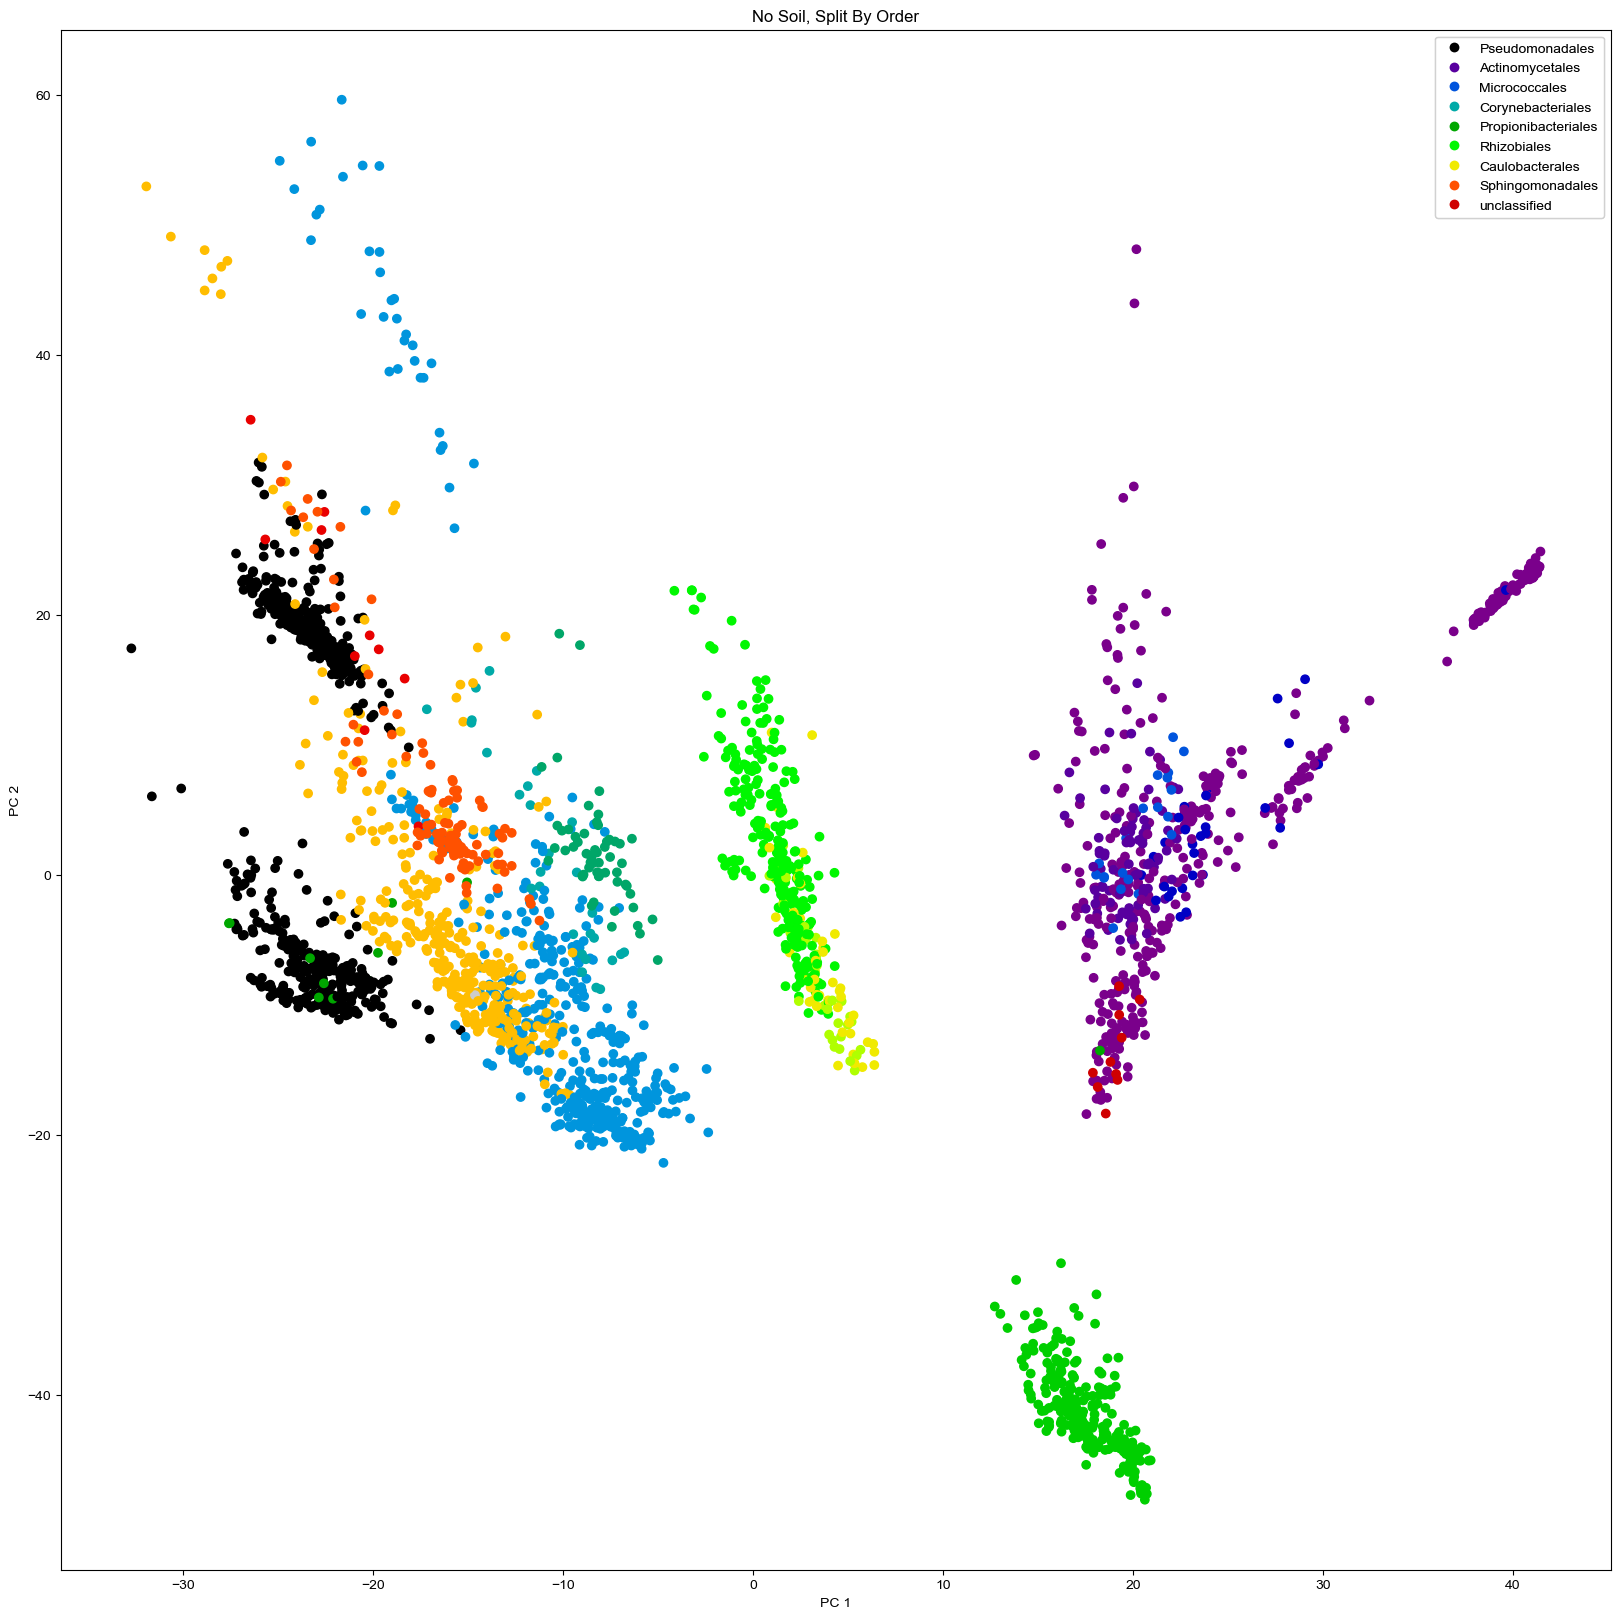

In [84]:
fig, ax = plt.subplots(1, figsize = (20,20))

scatter2 = ax.scatter(x_plot,y_plot, c = np.array(pca_order_numeric), cmap = 'nipy_spectral')
handles, _ = scatter2.legend_elements(prop="colors", alpha=1) 
legend1 = ax.legend(handles, pca_orders, loc="upper right")
ax.add_artist(legend1)
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_title("No Soil, Split By Order")

# Feature Selection

In [30]:
# https://towardsdatascience.com/feature-selection-using-logistic-regression-model-efc949569f58

param = {'C': [10**-2,10**-1,10**0,10**1,10**2]}

lr_model = LogisticRegression(penalty='l1', solver='liblinear')
gs_model = GridSearchCV(estimator=lr_model, param_grid=param)
gs_model.fit(X_train, y_train)

# Train a LR model with best parameters
model = LogisticRegression(**gs_model.best_params_, penalty='l1', solver='liblinear')
model.fit(X_train, y_train)
coef = model.coef_[0]

In [31]:
# Trimming features from the X dataset

imp_features = pd.Series(X.columns)[list(coef!=0)]
X_train = X_train[imp_features]
X_test = X_test[imp_features]
X = X[imp_features]

In [32]:
imp_features.shape

(311,)

In [33]:
# Saving important features to file

imp_features.to_csv('logistic_regression_features.csv', index=True, header=False)

In [34]:
# Making file with all coefficents of important features (for feature importance)

all_features_coeff = pd.concat([pd.DataFrame(features), pd.DataFrame(coef)], axis = 1)
all_features_coeff.columns = 'Features', 'Coefficents'

In [35]:
all_features_coeff

,Features,Coefficents
0,AA1,0.0
1,AA10,0.0
2,AA12,0.0
3,AA3,0.0
4,AA4,0.0
...,...,...
4535,COG5661,0.0
4536,COG5662,0.0
4537,COG5663,0.0
4538,COG5664,0.0


# Data Visualization

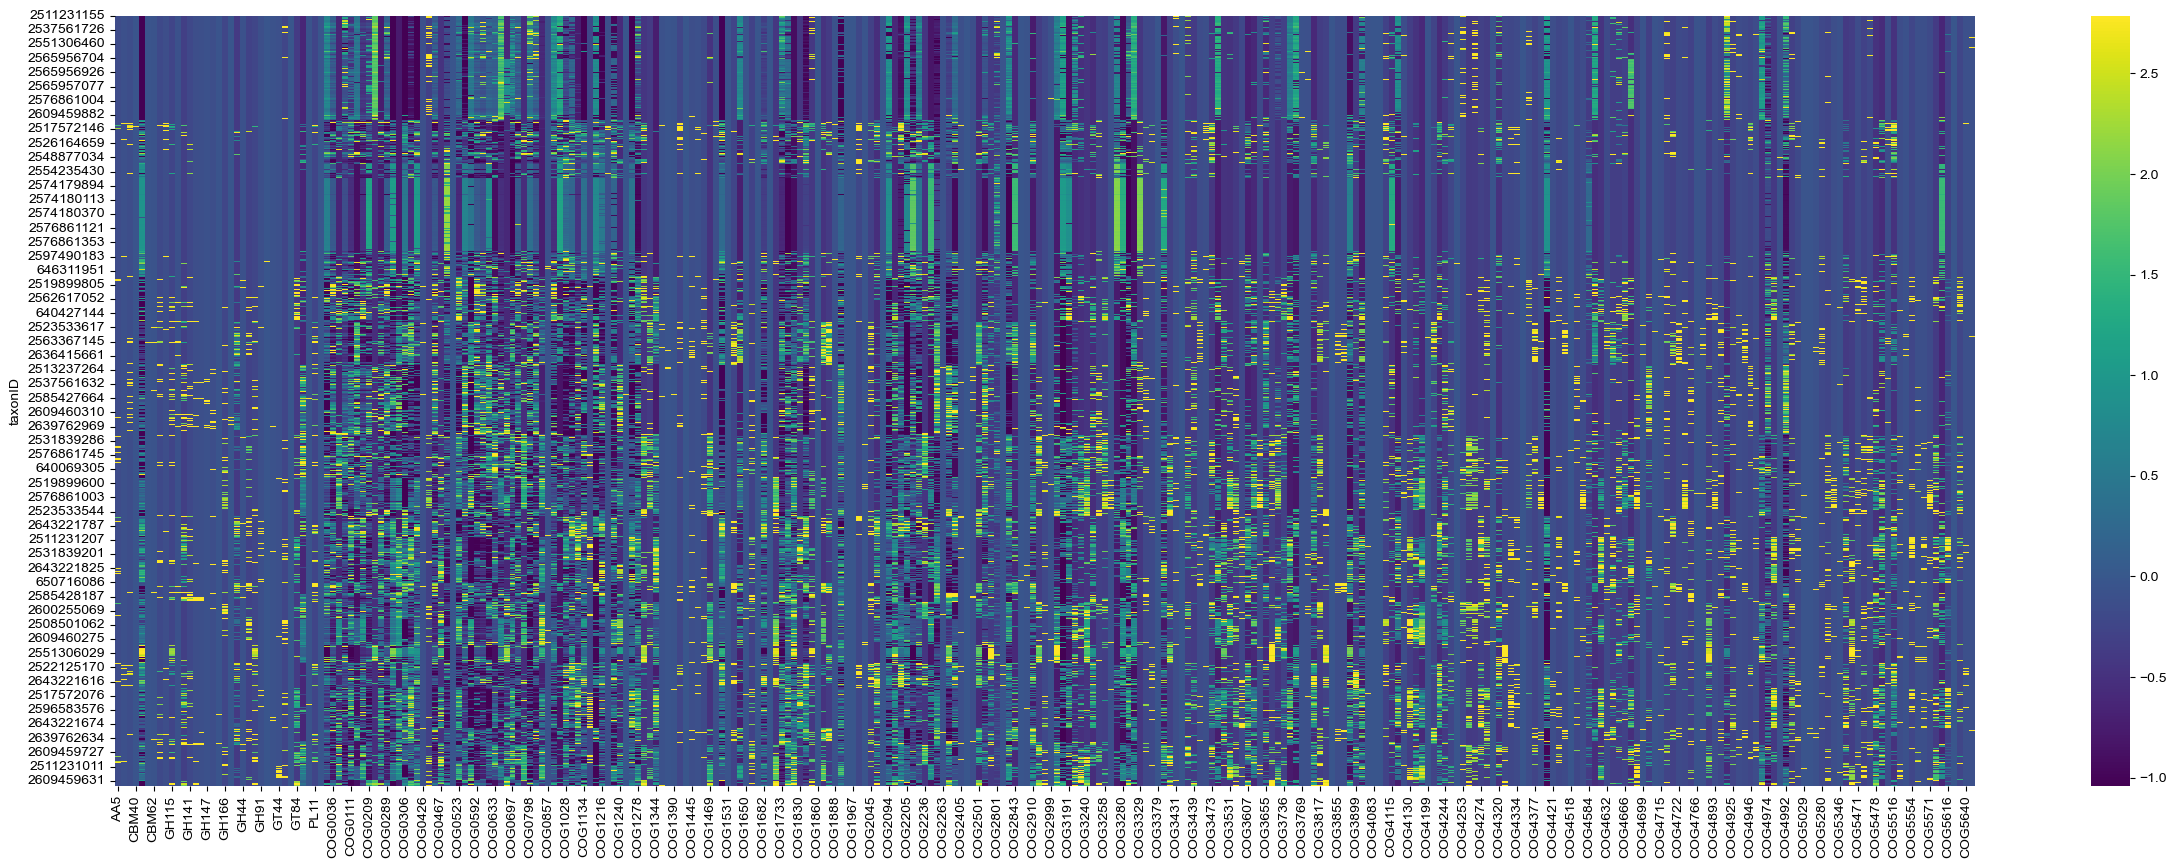

(3261, 311)


In [36]:
fig, ax = plt.subplots(figsize=(30,10))
X_forplotting = X
X_forplotting.index = df['taxonID']
ax = sb.heatmap(X_forplotting, robust = True, cmap = 'viridis') # square = True, 
plt.show()
print(X_forplotting.shape)

# Model Training

## Logistic Regression, Three Penalties

In [37]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [38]:
clf_l1 = LogisticRegression(random_state=42, max_iter = 5000, penalty = 'l1', solver = 'saga').fit(X_train, y_train)
clf_l2 = LogisticRegression(random_state=42, max_iter = 500, penalty = 'l2').fit(X_train, y_train)
clf_en = LogisticRegression(random_state=42, max_iter = 5000, penalty = 'elasticnet', solver = 'saga', l1_ratio = 0.5).fit(X_train, y_train)

In [39]:
y_pred_l1 = clf_l1.predict_proba(X_test)
y_pred_l2 = clf_l2.predict_proba(X_test)
y_pred_en = clf_en.predict_proba(X_test)

In [40]:
y_pred_class_l1 = clf_l1.predict(X_test)
y_pred_class_l2 = clf_l2.predict(X_test)
y_pred_class_en = clf_en.predict(X_test)

In [41]:
clf_l1_f1 = f1_score(y_test, y_pred_class_l1, average='macro')
clf_l2_f1 = f1_score(y_test, y_pred_class_l2, average='macro')
clf_en_f1 = f1_score(y_test, y_pred_class_en, average='macro')

In [42]:
print(clf_l1_f1, clf_l2_f1, clf_en_f1)

0.866121022983768 0.8710816512800563 0.8669025952140208


In [43]:
print(clf_l1.score(X_train, y_train), clf_l1.score(X_test, y_test))

0.9958791208791209 0.8765088207985144


In [44]:
print(clf_l2.score(X_train, y_train), clf_l2.score(X_test, y_test))

0.9986263736263736 0.8811513463324049


In [45]:
print(clf_en.score(X_train, y_train), clf_en.score(X_test, y_test))

0.9972527472527473 0.8774373259052924


In [46]:
precision_l1, recall_l1, thresholds_l1 = precision_recall_curve(y_test, y_pred_l1[:,0], pos_label = ["NPA"])
precision_l2, recall_l2, thresholds_l2 = precision_recall_curve(y_test, y_pred_l2[:,0], pos_label = ["NPA"])
precision_en, recall_en, thresholds_en = precision_recall_curve(y_test, y_pred_en[:,0], pos_label = ["NPA"])

[]

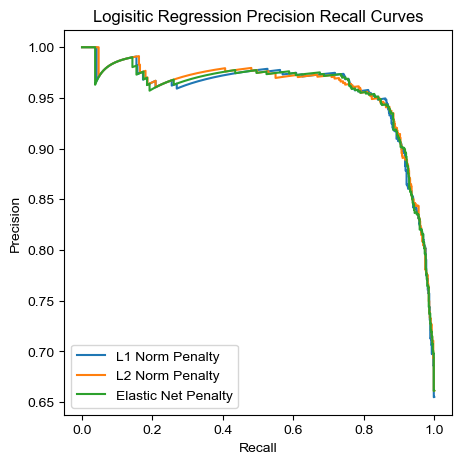

In [47]:
fig, ax = plt.subplots(1, figsize=(5, 5))

ax.plot(recall_l1, precision_l1)
ax.plot(recall_l2, precision_l2)
ax.plot(recall_en, precision_en)
ax.legend(['L1 Norm Penalty', 'L2 Norm Penalty', 'Elastic Net Penalty'])
ax.set_title('Logisitic Regression Precision Recall Curves')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')

plt.plot()

In [48]:
# Get largest features (using absolute value!!)

coef_l1 = abs(clf_l1.coef_[0])
coef_l2 = abs(clf_l2.coef_[0])
coef_en = abs(clf_en.coef_[0])

imp_features.reset_index(drop=True, inplace=True)

l1_coeff = pd.concat([pd.DataFrame(imp_features), pd.DataFrame(coef_l1)], axis = 1)
l1_coeff.index = imp_features
l1_coeff.columns = 'Features', 'Coefficents'

l2_coeff = pd.concat([pd.DataFrame(imp_features), pd.DataFrame(coef_l2)], axis = 1)
l2_coeff.index = imp_features
l2_coeff.columns = 'Features', 'Coefficents'

en_coeff = pd.concat([pd.DataFrame(imp_features), pd.DataFrame(coef_en)], axis = 1)
en_coeff.index = imp_features
en_coeff.columns = 'Features', 'Coefficents'

In [49]:
l1_coeff.nlargest(20, 'Coefficents')['Coefficents']

COG0168    1.110800
COG2217    1.104828
COG2608    1.062947
GH74       0.985073
COG1830    0.880209
COG0289    0.860088
COG5554    0.832906
COG0697    0.805095
COG4976    0.801831
COG0029    0.800130
COG2930    0.798187
COG4191    0.772292
COG2225    0.757040
COG1324    0.726652
COG4373    0.713755
COG3638    0.673460
COG4722    0.646480
COG3189    0.638367
COG0111    0.621880
COG3329    0.605554
Name: Coefficents, dtype: float64

In [50]:
l2_coeff.nlargest(20, 'Coefficents')['Coefficents']

COG2217    1.361008
COG0168    1.355772
COG1830    1.160686
COG2608    1.084540
GH74       1.081694
COG2930    1.013298
COG0697    0.969001
COG2225    0.953767
COG0029    0.895166
COG0289    0.867206
COG4191    0.850665
COG4373    0.842000
COG3638    0.833502
COG1324    0.805125
COG5554    0.794049
COG4722    0.792146
COG0111    0.766004
COG3189    0.745353
COG0607    0.729114
COG1328    0.725015
Name: Coefficents, dtype: float64

In [51]:
en_coeff.nlargest(20, 'Coefficents')['Coefficents']

COG0168    1.194455
COG2217    1.168569
COG2608    1.112262
GH74       1.049957
COG1830    0.991744
COG2930    0.910301
COG2225    0.854046
COG0289    0.852457
COG0697    0.841381
COG4191    0.810185
COG5554    0.804165
COG0029    0.789444
COG4976    0.762583
COG4373    0.759978
COG1324    0.756853
COG3638    0.736738
COG4722    0.715403
COG0111    0.688471
COG3189    0.666980
COG4297    0.655828
Name: Coefficents, dtype: float64

## Support Vector Machine Classifier

In [52]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

clf_svc = SVC(probability = True).fit(X_train, y_train)
clf_svc2 = SVC(kernel = 'linear', probability = True).fit(X_train, y_train)
clf_svc3 = SVC(kernel = 'sigmoid', probability = True).fit(X_train, y_train)

In [53]:
print(clf_svc.score(X_train, y_train), clf_svc.score(X_test, y_test))

0.9835164835164835 0.8960074280408542


In [54]:
print(clf_svc2.score(X_train, y_train), clf_svc2.score(X_test, y_test))

0.9995421245421245 0.8662952646239555


In [55]:
print(clf_svc3.score(X_train, y_train), clf_svc3.score(X_test, y_test))

0.9537545787545788 0.883008356545961


In [56]:
y_pred_1 = clf_svc.predict_proba(X_test)
y_pred_2 = clf_svc2.predict_proba(X_test)
y_pred_3 = clf_svc3.predict_proba(X_test)

In [57]:
precision_1, recall_1, thresholds_1 = precision_recall_curve(y_test, y_pred_1[:,0], pos_label = 'NPA')
precision_2, recall_2, thresholds_2 = precision_recall_curve(y_test, y_pred_2[:,0], pos_label = 'NPA')
precision_3, recall_3, thresholds_3 = precision_recall_curve(y_test, y_pred_3[:,0], pos_label = 'NPA')

[]

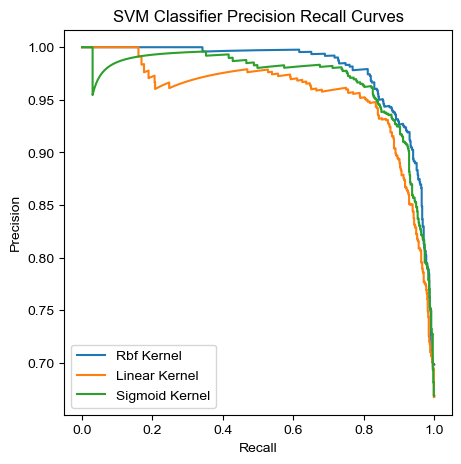

In [58]:
fig, ax = plt.subplots(1, figsize=(5, 5))

ax.plot(recall_1, precision_1)
ax.plot(recall_2, precision_2)
ax.plot(recall_3, precision_3)
ax.set_title('SVM Classifier Precision Recall Curves')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(['Rbf Kernel','Linear Kernel','Sigmoid Kernel'])

plt.plot()

## Gaussian Naive Bayes Classifier

In [59]:
# https://scikit-learn.org/stable/modules/naive_bayes.html BAD AT PREDICTIONS

gnb = GaussianNB().fit(X_train,y_train)

In [60]:
y_pred = gnb.predict_proba(X_test)

In [61]:
gnb.score(X_train,y_train)

0.6813186813186813

In [62]:
gnb.score(X_test,y_test)

0.6480965645311049

In [63]:
precision_1, recall_1, thresholds_1 = precision_recall_curve(y_test, y_pred_1[:,0], pos_label = 'NPA')

[]

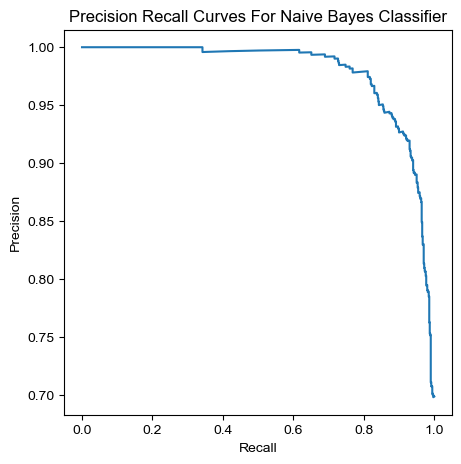

In [64]:
fig, ax = plt.subplots(1, figsize=(5, 5))

ax.plot(recall_1, precision_1)
ax.set_title('Precision Recall Curves For Naive Bayes Classifier')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')

plt.plot()

# Testing on Soil

In [65]:
df_soil = total_data[total_data["Classification"] == "soil"]
X_soil = df_soil[imp_features]

In [66]:
y_pred_l1_soil = clf_l1.predict(X_soil)
y_pred_l2_soil = clf_l2.predict(X_soil)
y_pred_en_soil = clf_en.predict(X_soil)
y_pred_svc_soil = clf_svc.predict(X_soil)
y_pred_gnb_soil = gnb.predict(X_soil)

# Models With Final Features

In [67]:
total_data = pd.read_csv("cleaned_data.dbcan_cog_HGT.tsv", sep="\t")
total_data = total_data.drop(columns = ['Unnamed: 0'])

df = total_data[total_data["Classification"] != "soil"]
order = df['Order']

features = df.columns[4:]
scaler = StandardScaler().fit(df[features])
df_normalized = pd.DataFrame(scaler.transform(df[features]), columns=features)
df = pd.concat([df.iloc[:, :4], df_normalized], axis=1)

final_features = pd.read_csv("overlapping_features.csv")
final_features_list = pd.Series(final_features['elements'])

In [68]:
X = df[final_features_list]
y = df["Classification"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)

In [69]:
# Code from Alex (modified) taken 1:30pm 4/24/23
kn_model = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
rf_model = RandomForestClassifier(n_estimators=100, max_depth = 12).fit(X_train, y_train)
lr_model = LogisticRegression(max_iter = 5000, penalty = 'l1', solver = 'saga').fit(X_train, y_train)
dt_model = DecisionTreeClassifier(max_depth = 7).fit(X_train, y_train)

In [70]:
y_pred_kn = kn_model.predict_proba(X_test)
y_pred_rf = rf_model.predict_proba(X_test)
y_pred_lr = lr_model.predict_proba(X_test)
y_pred_dt = dt_model.predict_proba(X_test)

In [71]:
precision_kn, recall_kn, thresholds_kn = precision_recall_curve(y_test, y_pred_kn[:,0], pos_label = 'NPA')
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_pred_rf[:,0], pos_label = 'NPA')
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test, y_pred_lr[:,0], pos_label = 'NPA')
precision_dt, recall_dt, thresholds_dt = precision_recall_curve(y_test, y_pred_dt[:,0], pos_label = 'NPA')

[]

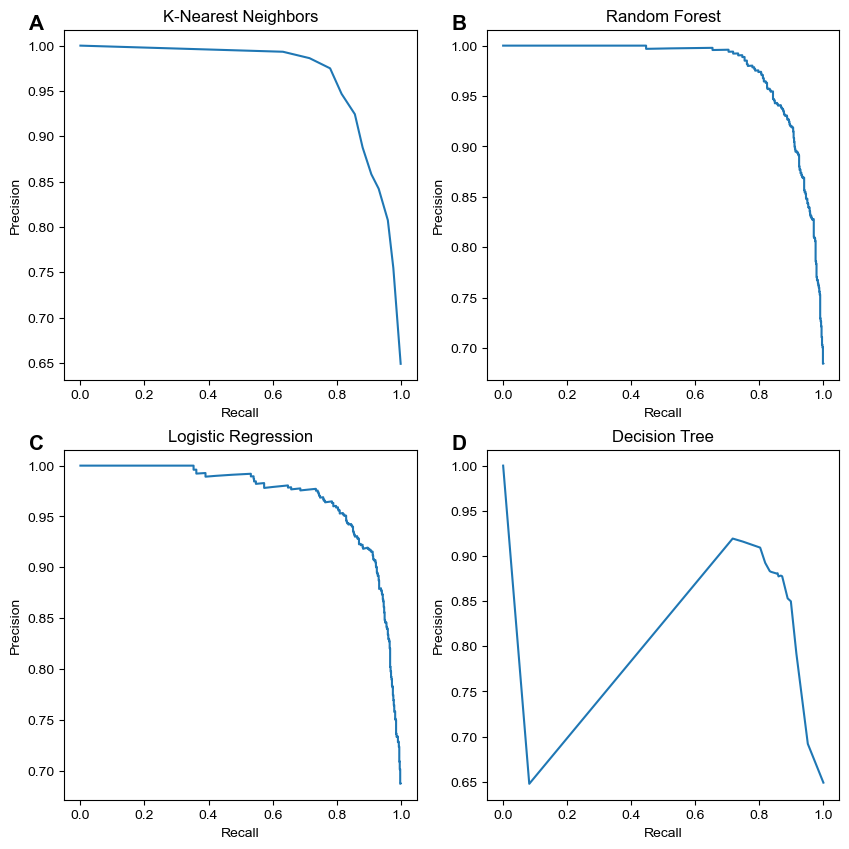

In [72]:
fig, ax = plt.subplots(2,2, figsize = (10,10))

ax[0,0].plot(recall_kn, precision_kn)
ax[0,0].set_title('K-Nearest Neighbors')
ax[0,0].set_xlabel('Recall')
ax[0,0].set_ylabel('Precision')
ax[0,0].text(-0.1, 1, 'A', size=15, transform=ax[0,0].transAxes, weight='bold')

ax[0,1].plot(recall_rf, precision_rf)
ax[0,1].set_title('Random Forest')
ax[0,1].set_xlabel('Recall')
ax[0,1].set_ylabel('Precision')
ax[0,1].text(-0.1, 1, 'B', size=15, transform=ax[0,1].transAxes, weight='bold')

ax[1,0].plot(recall_lr, precision_lr)
ax[1,0].set_title('Logistic Regression')
ax[1,0].set_xlabel('Recall')
ax[1,0].set_ylabel('Precision')
ax[1,0].text(-0.1, 1, 'C', size=15, transform=ax[1,0].transAxes, weight='bold')

ax[1,1].plot(recall_dt, precision_dt)
ax[1,1].set_title('Decision Tree')
ax[1,1].set_xlabel('Recall')
ax[1,1].set_ylabel('Precision')
ax[1,1].text(-0.1, 1, 'D', size=15, transform=ax[1,1].transAxes, weight='bold')

plt.plot()

[]

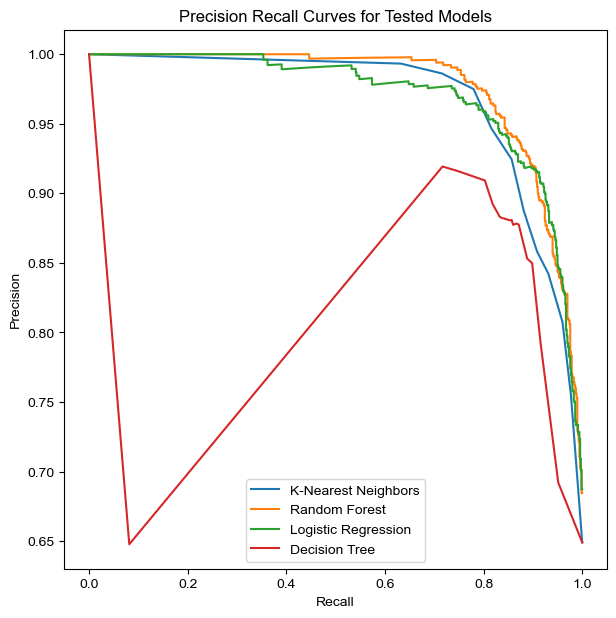

In [73]:
fig, ax = plt.subplots(1, figsize = (7,7))

ax.plot(recall_kn, precision_kn)
ax.plot(recall_rf, precision_rf)
ax.plot(recall_lr, precision_lr)
ax.plot(recall_dt, precision_dt)

ax.legend(['K-Nearest Neighbors','Random Forest','Logistic Regression','Decision Tree'])
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision Recall Curves for Tested Models')

plt.plot()